In [13]:
from itertools import count
import numpy as np
import argparse
import cv2
from PIL import ImageGrab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import csv
import time
import socket
from imutils.video import VideoStream
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pandas
from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.load_weights('C:/Users/User/Desktop/ERS/model.h5')

In [14]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     objects = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [15]:
# import cv2
# import os
# import numpy as np
# import torch

# input folder
folder='C:/Users/User/Desktop/test/happy'

images = []
# for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename))

#     if img is not None:
#         images.append(img)
        
# print(images)
def facecrop(image):  
    facedata = 'C:/Users/User/Desktop/ERS/haar cascade files/haarcascade_frontalface_default.xml'
    cascade = cv2.CascadeClassifier(facedata)
    img_num = 0
    
    for filename in os.listdir(folder):
        img_num += 1
        img = cv2.imread(os.path.join(folder,filename))
        
        if img is not None:
            images.append(img)

        try:

            minisize = (img.shape[1],img.shape[0])
            miniframe = cv2.resize(img, minisize)

            faces = cascade.detectMultiScale(miniframe)

            for f in faces:
                x, y, w, h = [ v for v in f ]
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

                sub_face = img[y:y+h, x:x+w]

                # images output folder
                cv2.imwrite('C:/Users/User/Desktop/test/happy_valid/capture{0}.jpg'.format(img_num), sub_face)
                #print ("Writing: " + image)

        except Exception as e:
            print (e)

   

if __name__ == '__main__':
    # first image to start looping 
    facecrop('C:/Users/User/Desktop/test/happy/im0.png')
#Testing a file.


# Redo comment below
# ------------------------------------------------------------------------------------------


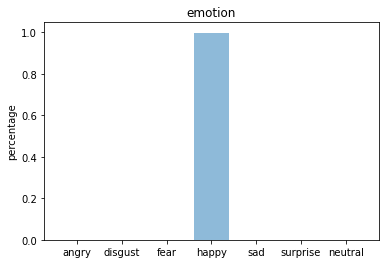

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


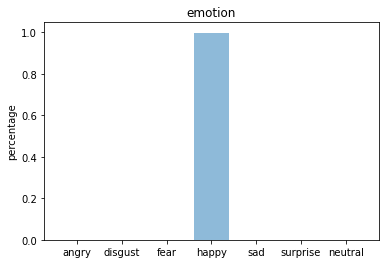

None


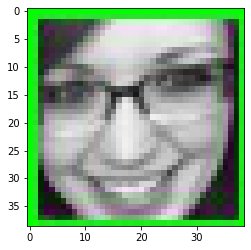

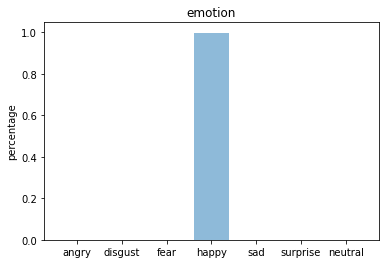

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


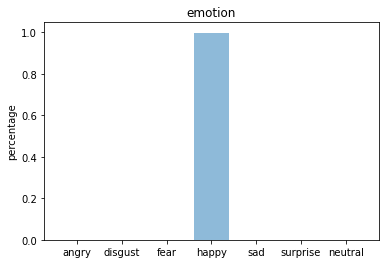

None


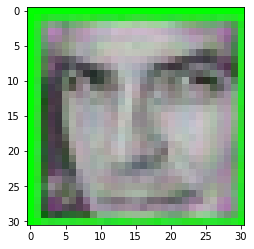

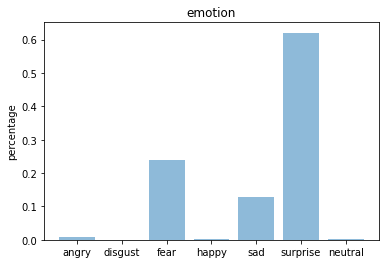

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


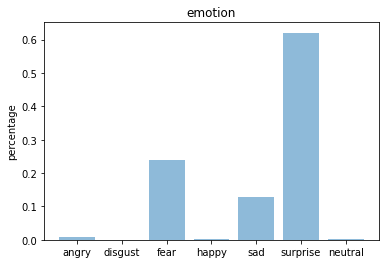

None


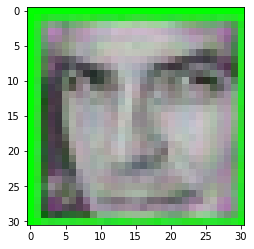

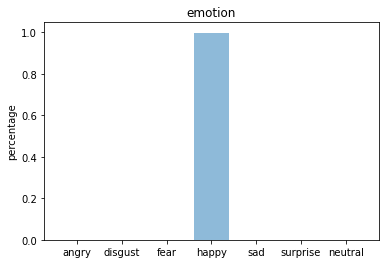

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


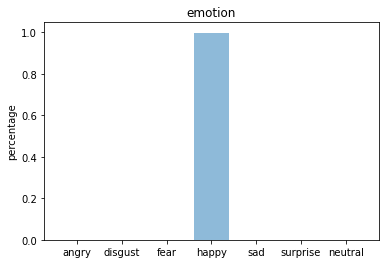

None


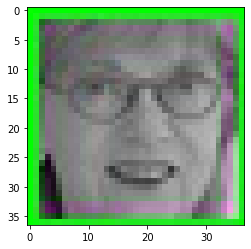

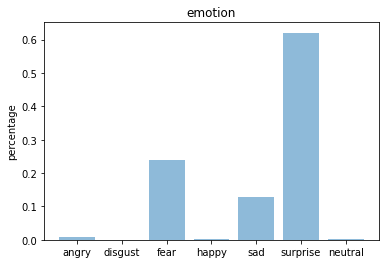

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


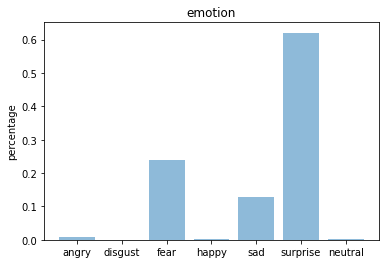

None


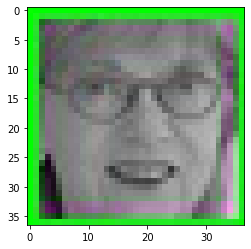

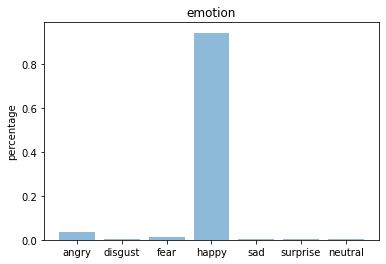

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


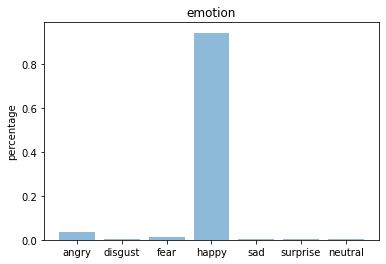

None


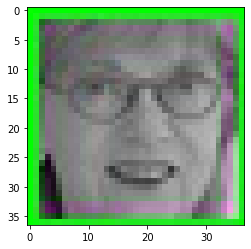

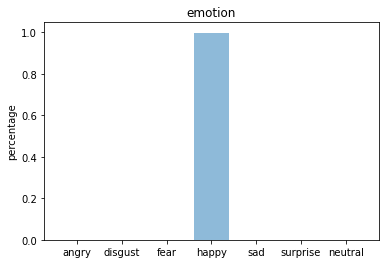

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


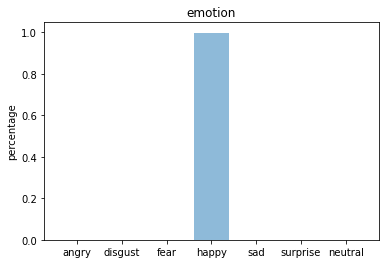

None


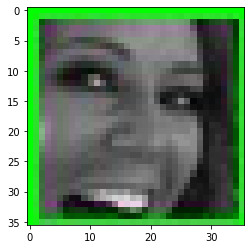

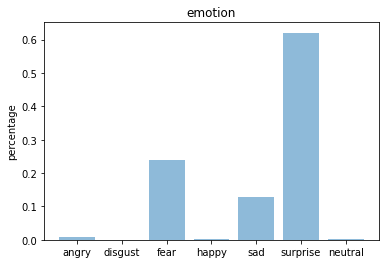

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


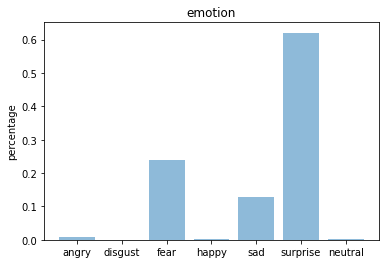

None


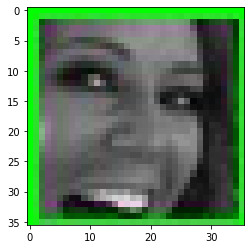

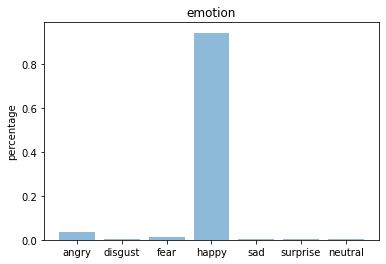

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


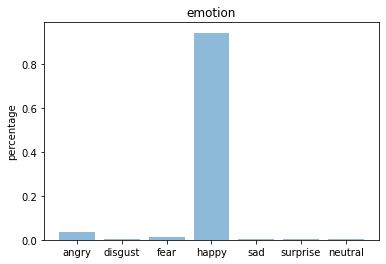

None


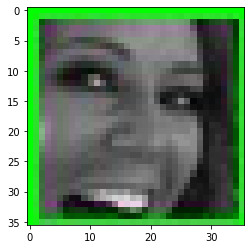

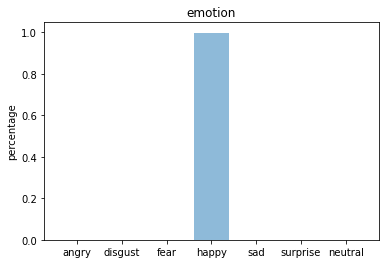

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


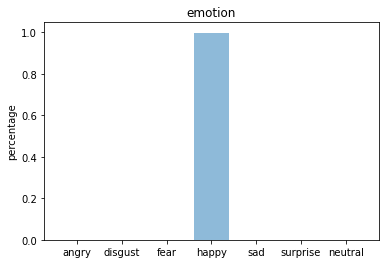

None


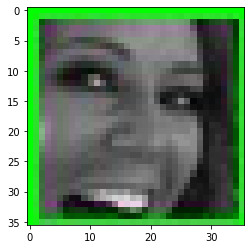

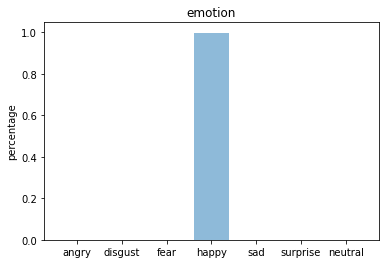

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


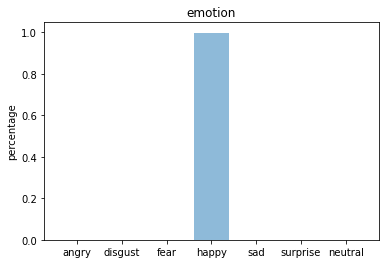

None


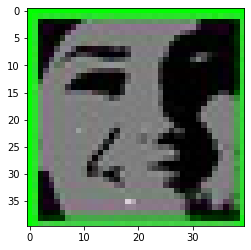

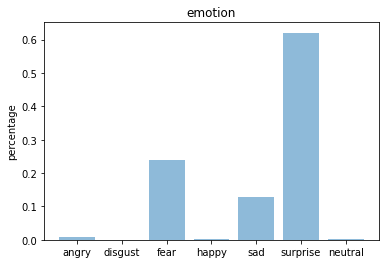

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


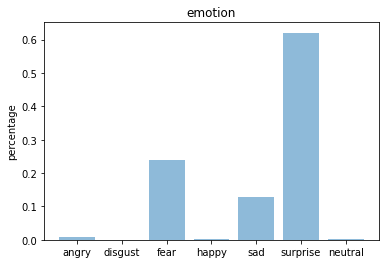

None


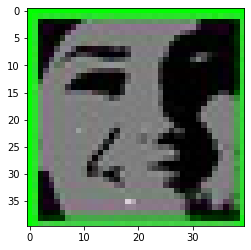

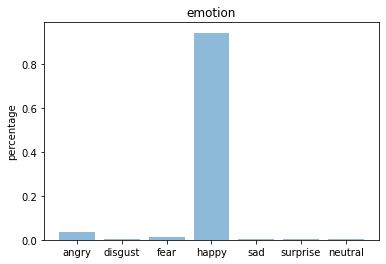

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


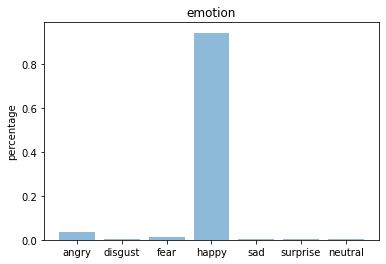

None


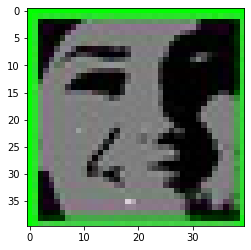

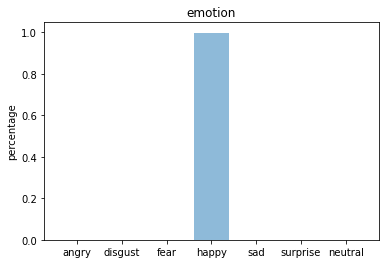

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


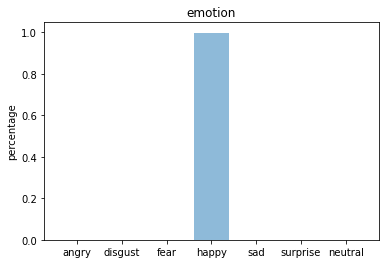

None


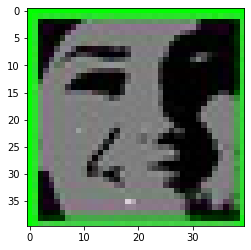

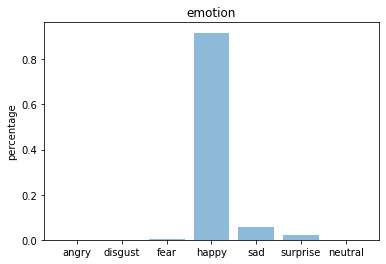

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


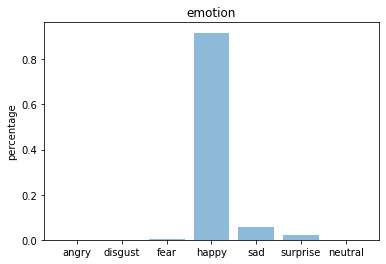

None


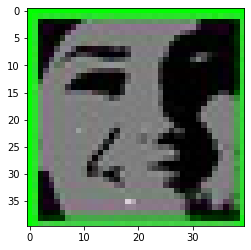

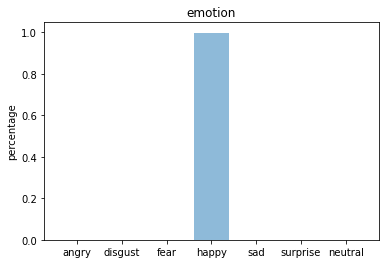

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


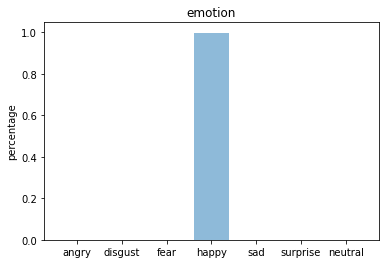

None


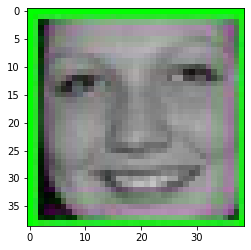

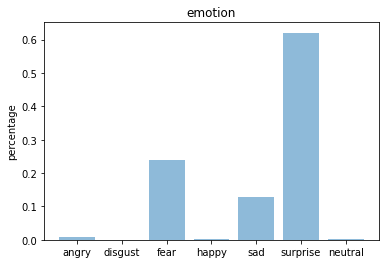

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


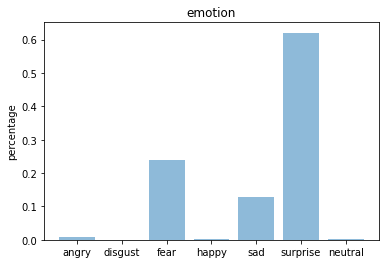

None


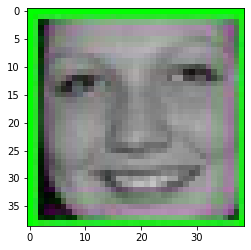

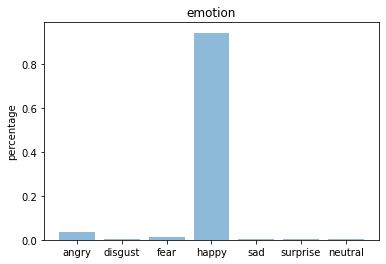

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


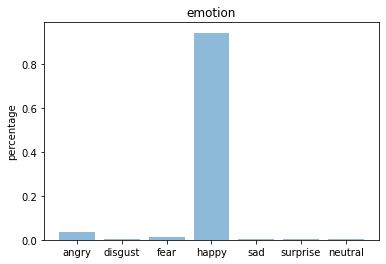

None


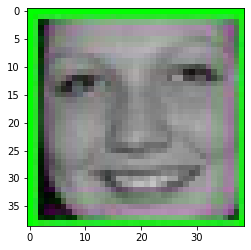

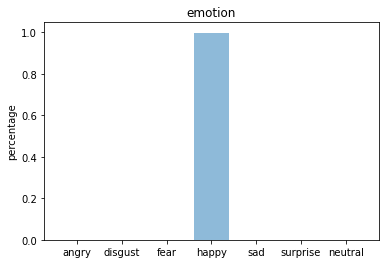

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


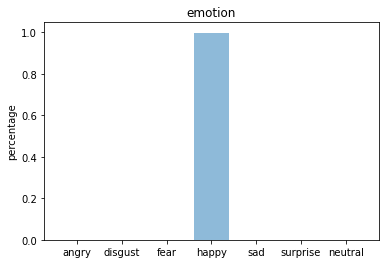

None


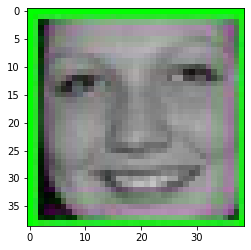

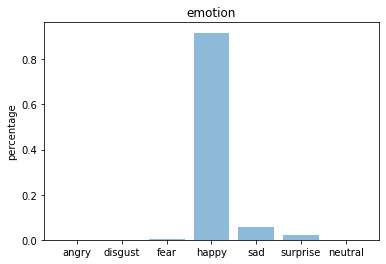

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


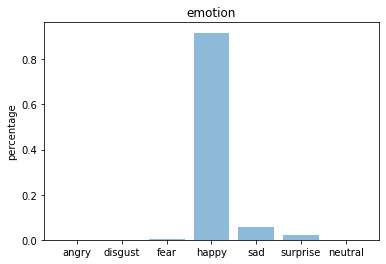

None


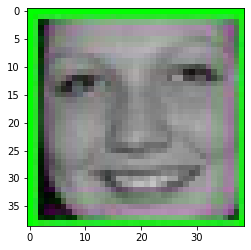

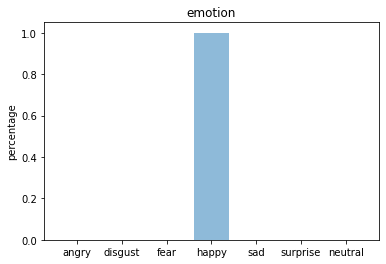

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


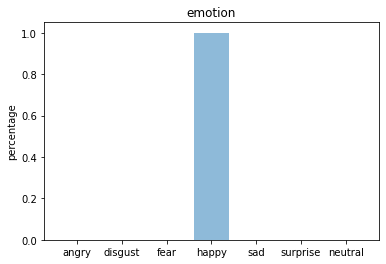

None


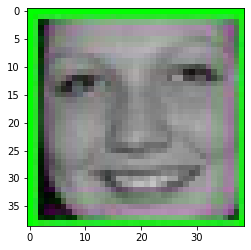

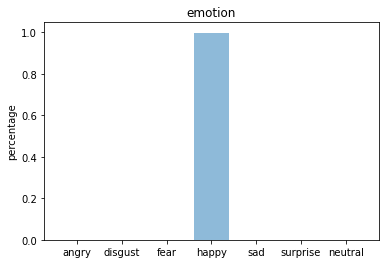

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


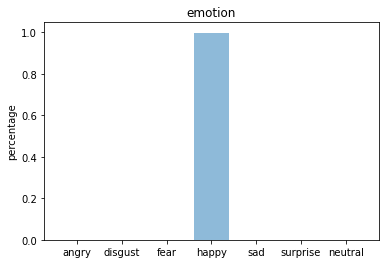

None


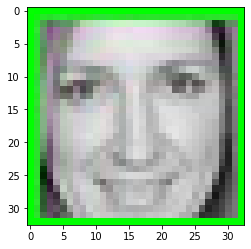

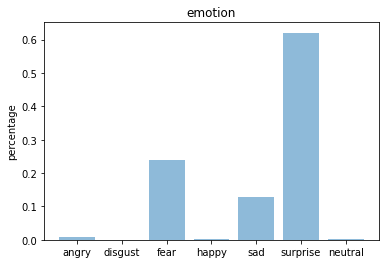

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


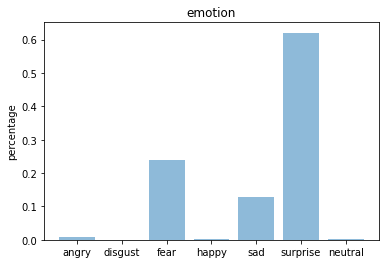

None


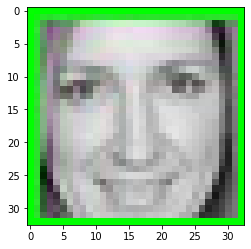

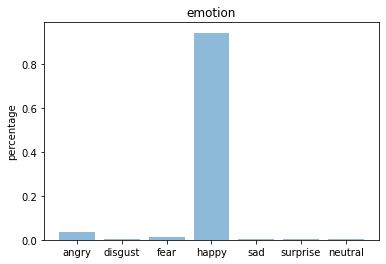

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


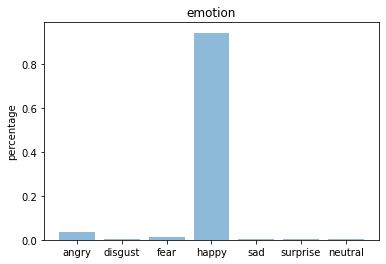

None


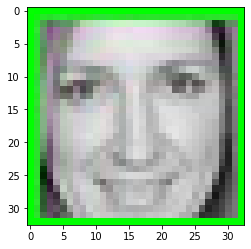

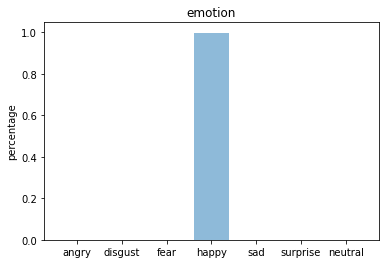

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


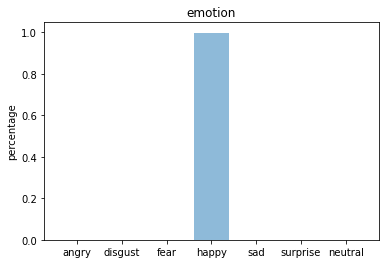

None


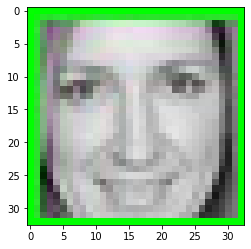

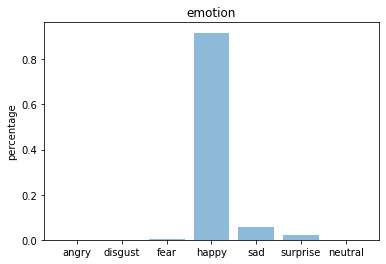

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


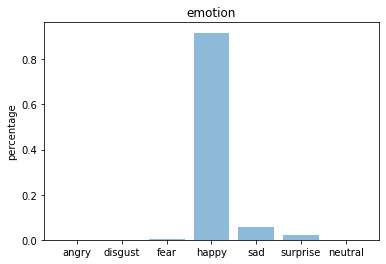

None


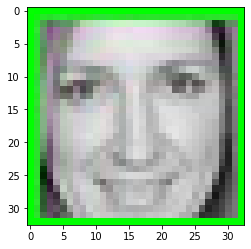

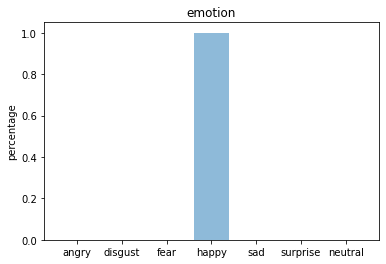

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


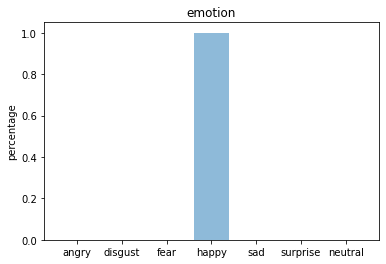

None


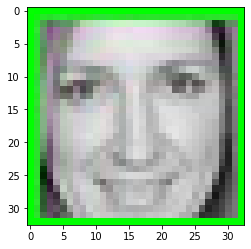

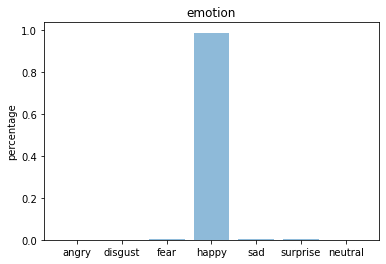

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


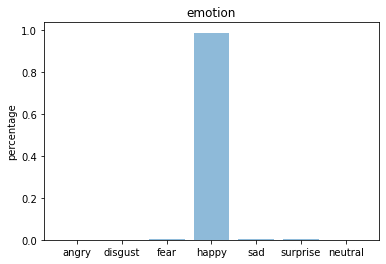

None


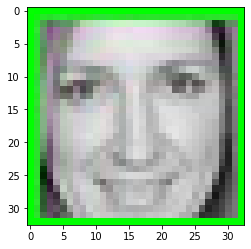

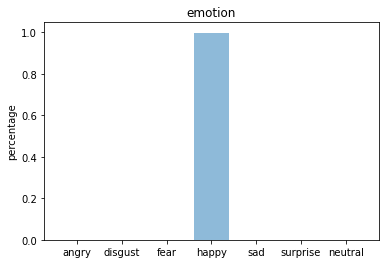

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


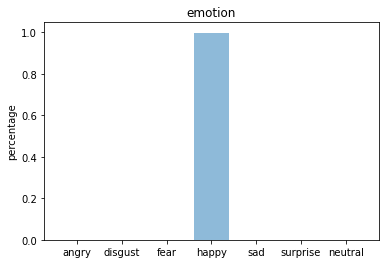

None


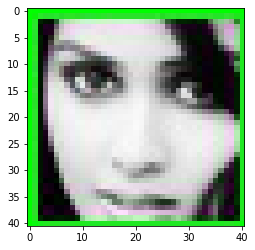

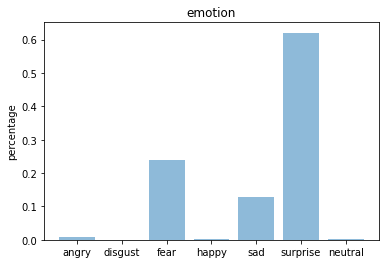

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


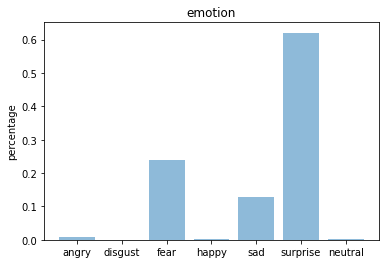

None


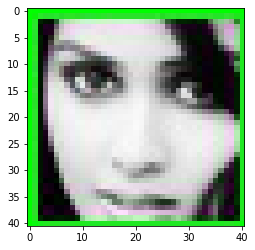

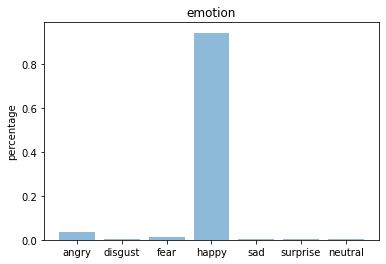

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


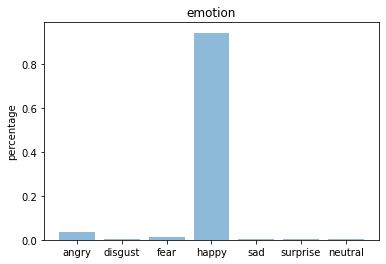

None


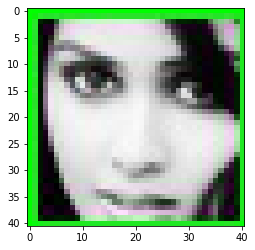

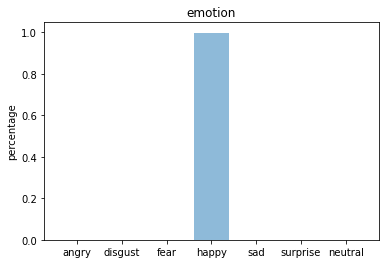

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


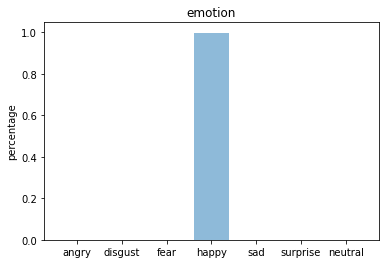

None


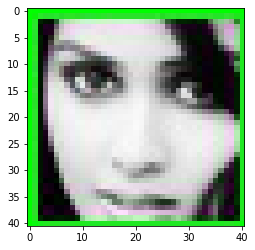

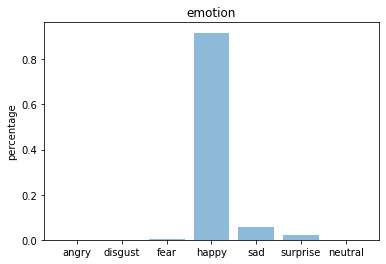

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


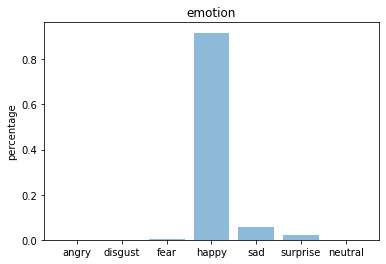

None


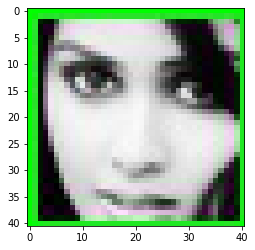

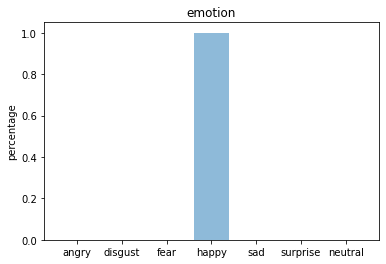

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


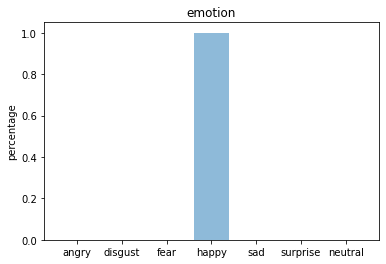

None


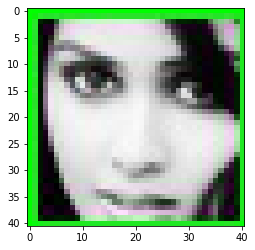

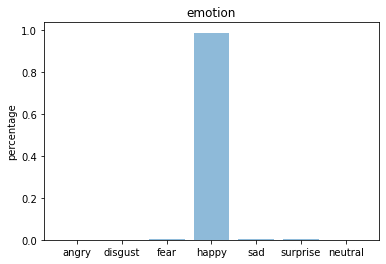

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


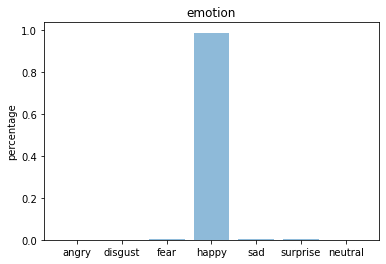

None


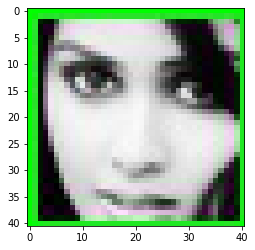

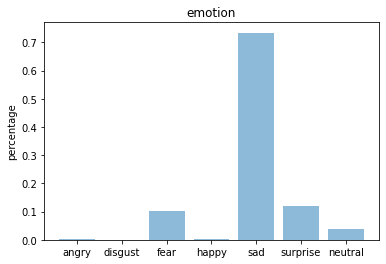

[[3.53266601e-03 1.28713600e-06 1.03346474e-01 1.98395387e-03
  7.33926892e-01 1.19504370e-01 3.77044231e-02]]
0.7339269


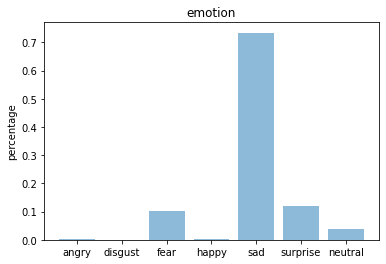

None


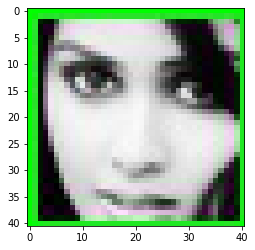

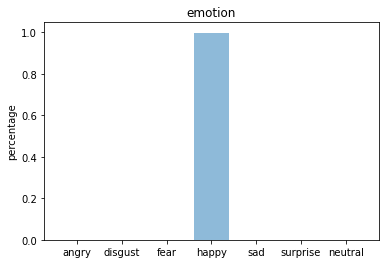

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


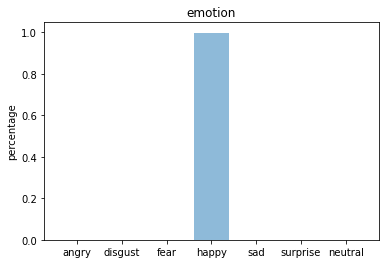

None


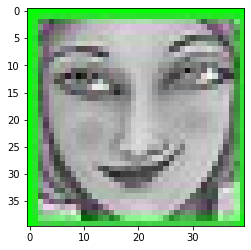

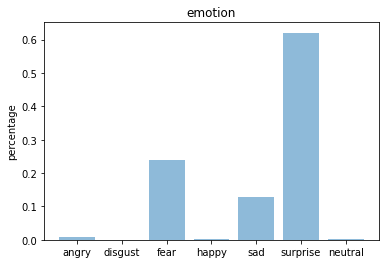

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


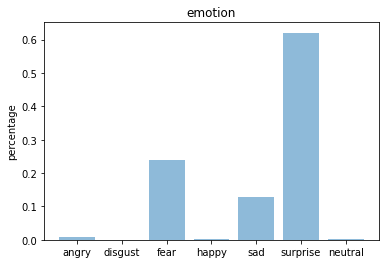

None


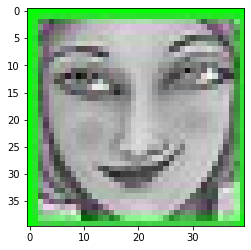

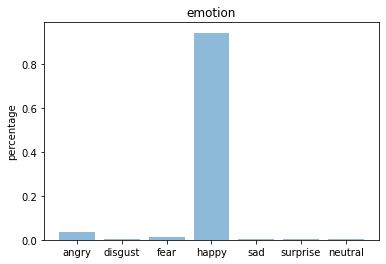

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


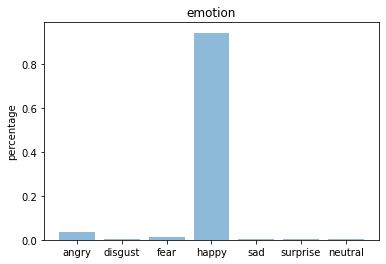

None


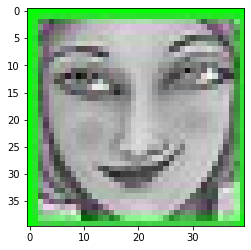

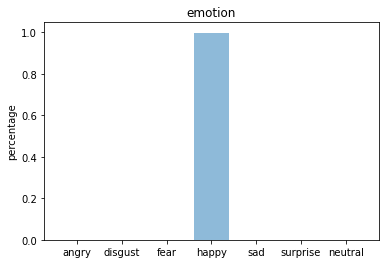

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


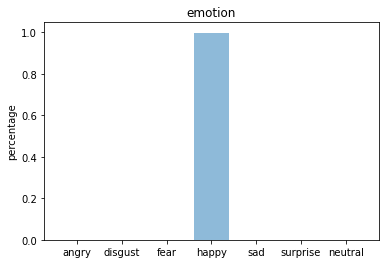

None


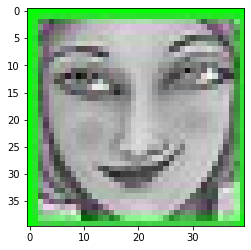

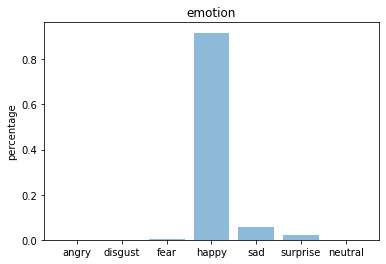

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


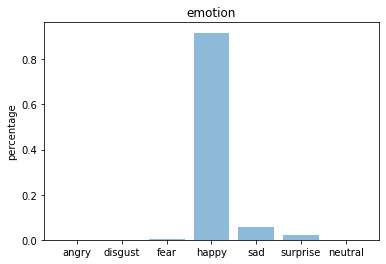

None


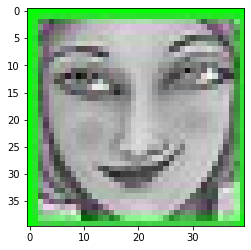

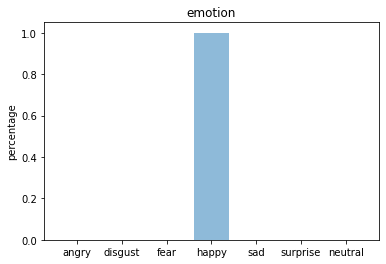

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


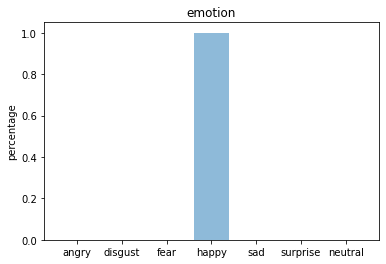

None


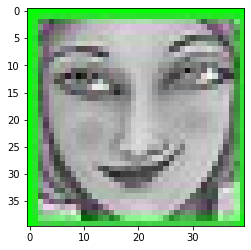

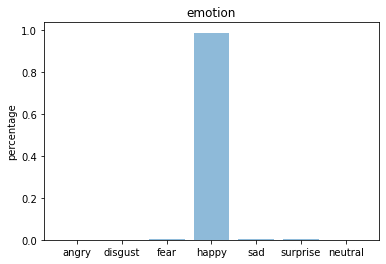

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


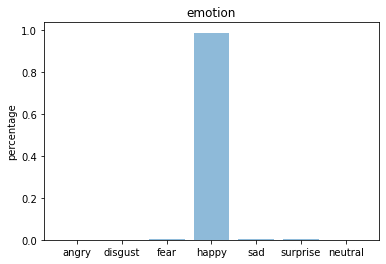

None


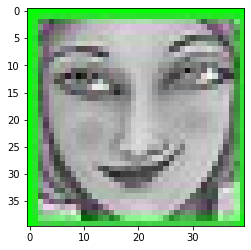

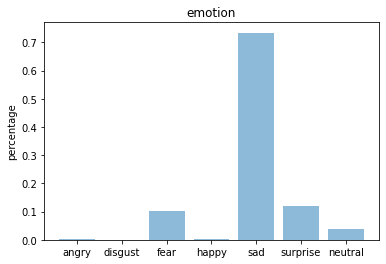

[[3.53266601e-03 1.28713600e-06 1.03346474e-01 1.98395387e-03
  7.33926892e-01 1.19504370e-01 3.77044231e-02]]
0.7339269


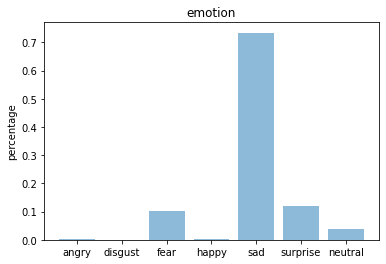

None


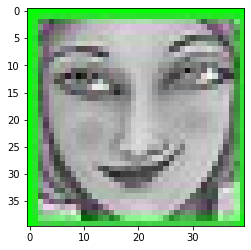

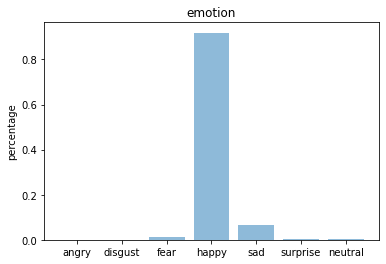

[[6.4829993e-04 1.0149136e-06 1.1666372e-02 9.1877925e-01 6.5536223e-02
  1.4567217e-03 1.9121328e-03]]
0.91877925


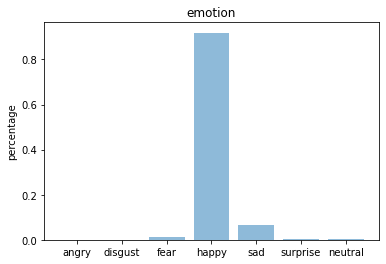

None


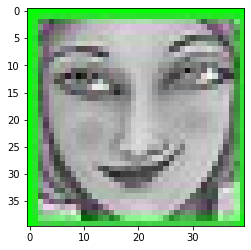

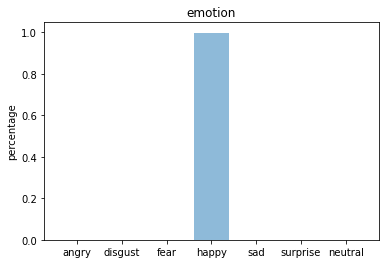

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


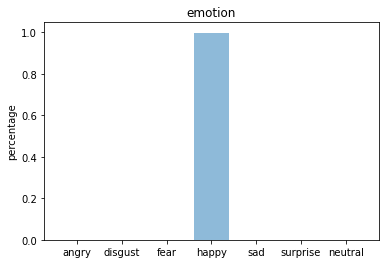

None


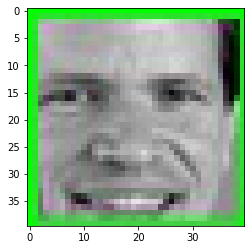

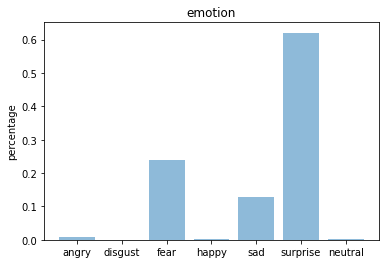

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


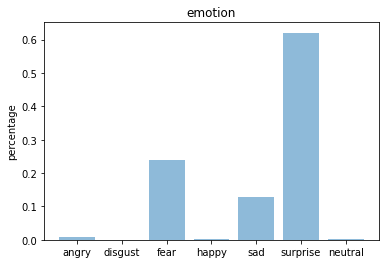

None


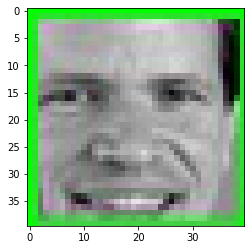

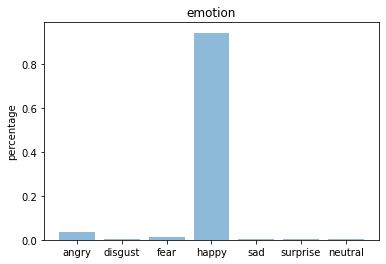

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


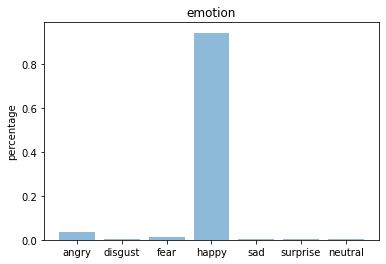

None


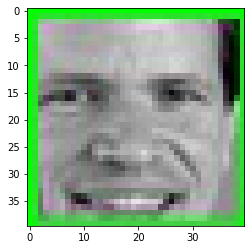

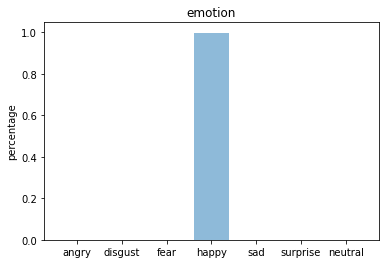

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


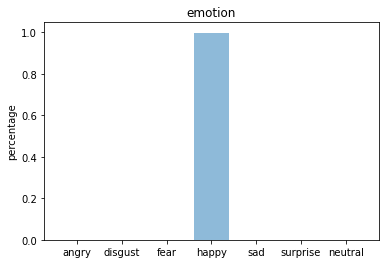

None


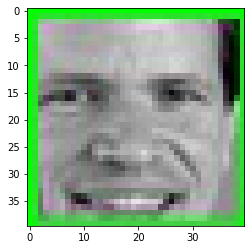

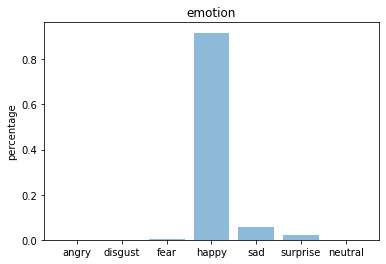

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


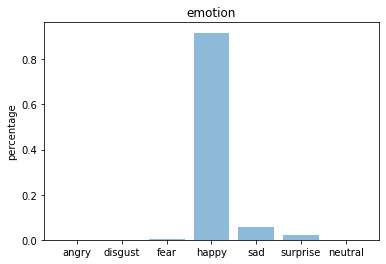

None


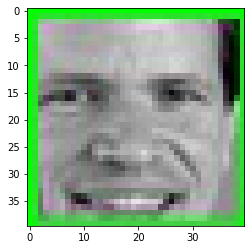

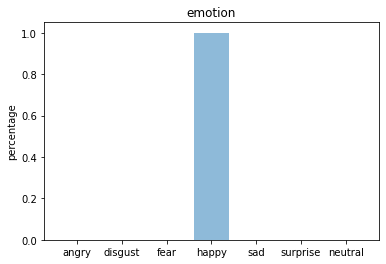

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


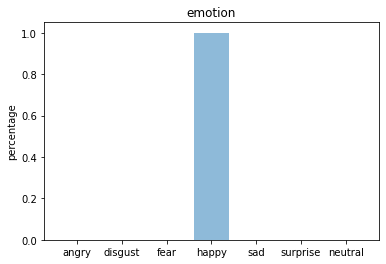

None


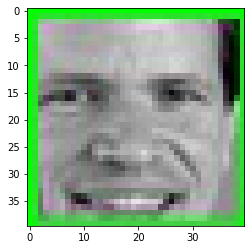

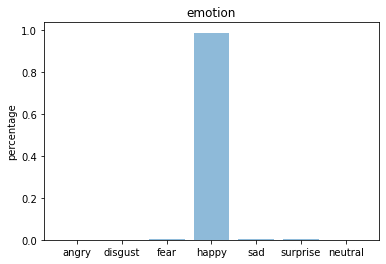

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


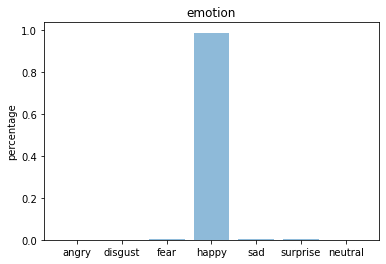

None


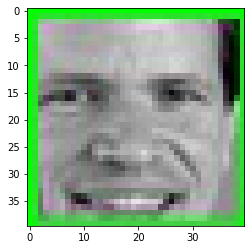

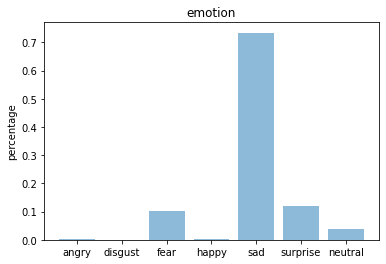

[[3.53266601e-03 1.28713600e-06 1.03346474e-01 1.98395387e-03
  7.33926892e-01 1.19504370e-01 3.77044231e-02]]
0.7339269


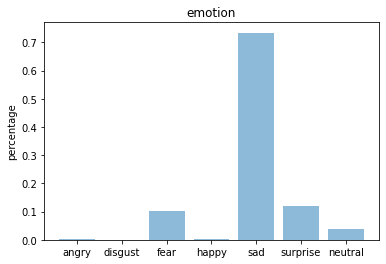

None


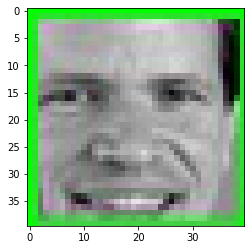

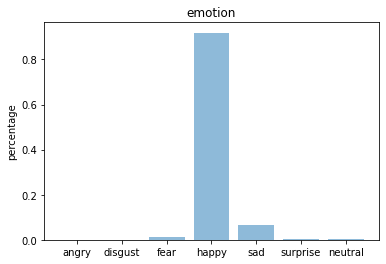

[[6.4829993e-04 1.0149136e-06 1.1666372e-02 9.1877925e-01 6.5536223e-02
  1.4567217e-03 1.9121328e-03]]
0.91877925


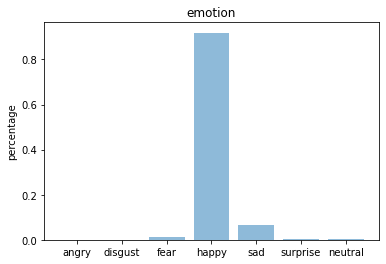

None


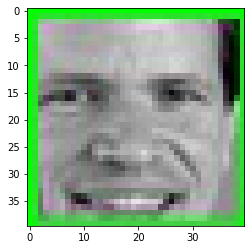

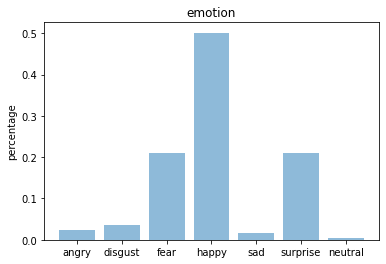

[[0.02345195 0.03495739 0.20984025 0.50113136 0.01626047 0.20981964
  0.00453897]]
0.50113136


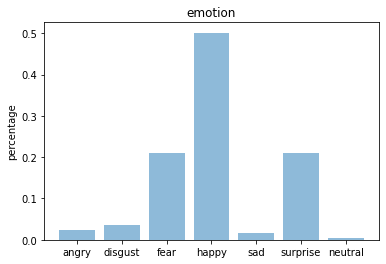

None


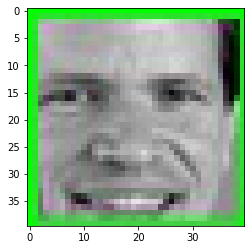

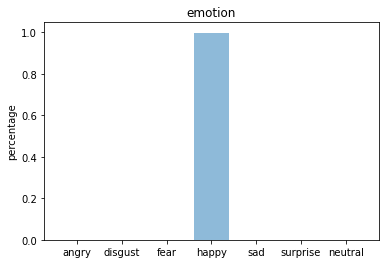

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


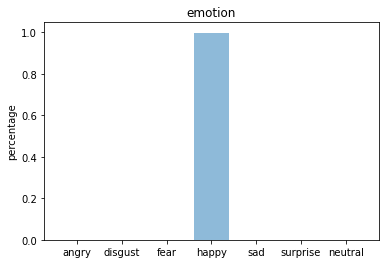

None


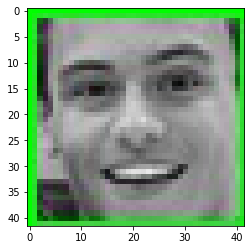

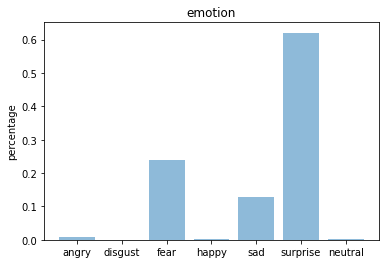

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


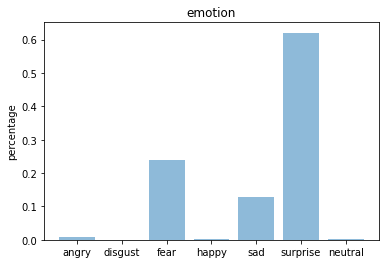

None


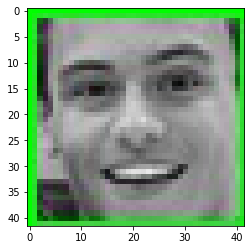

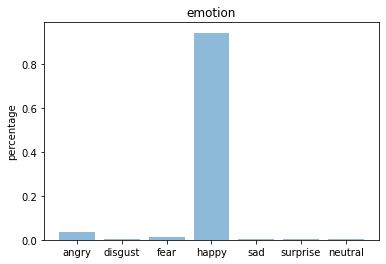

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


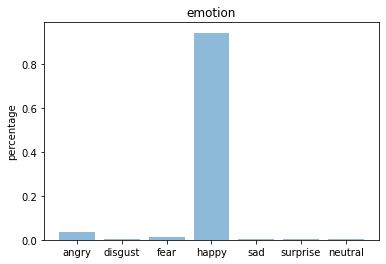

None


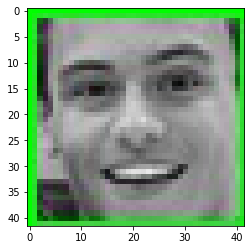

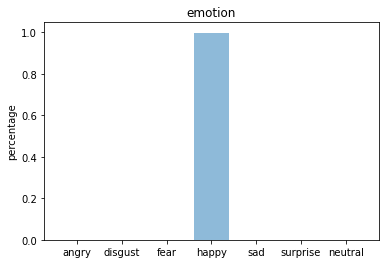

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


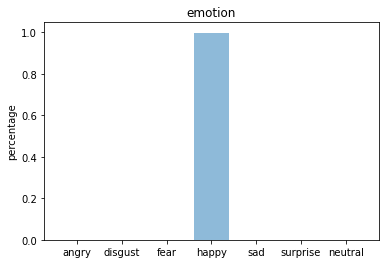

None


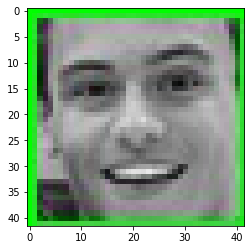

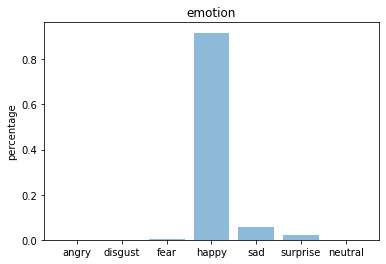

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


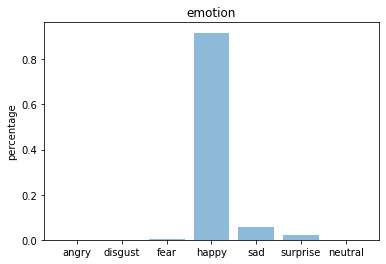

None


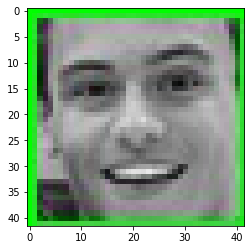

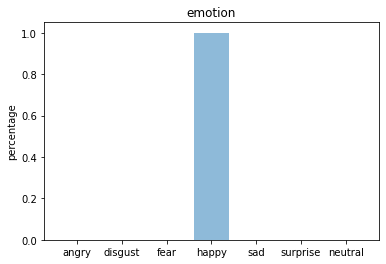

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


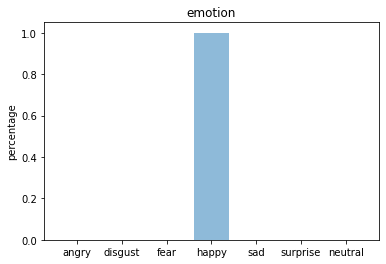

None


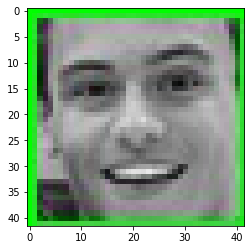

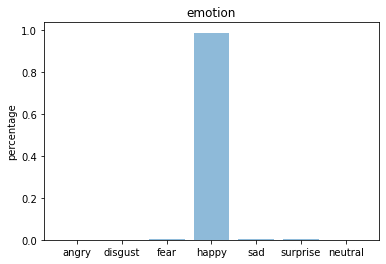

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


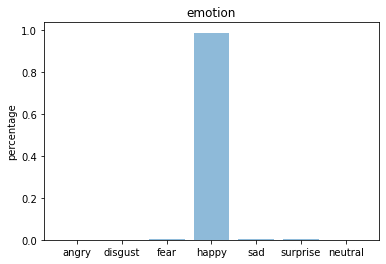

None


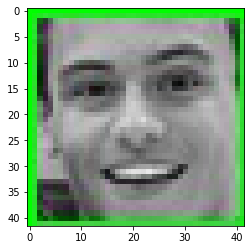

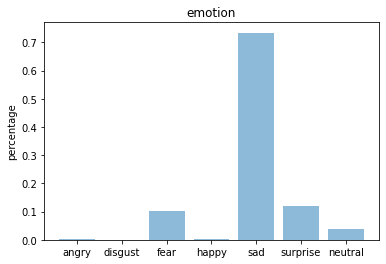

[[3.53266601e-03 1.28713600e-06 1.03346474e-01 1.98395387e-03
  7.33926892e-01 1.19504370e-01 3.77044231e-02]]
0.7339269


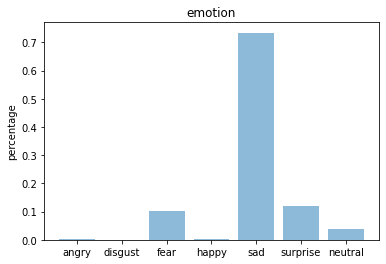

None


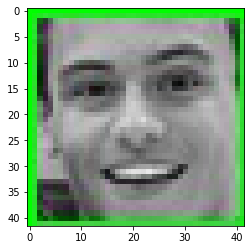

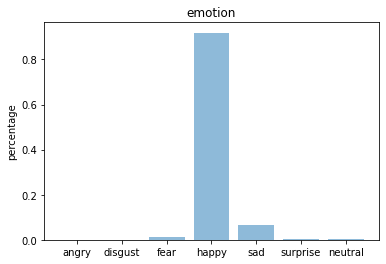

[[6.4829993e-04 1.0149136e-06 1.1666372e-02 9.1877925e-01 6.5536223e-02
  1.4567217e-03 1.9121328e-03]]
0.91877925


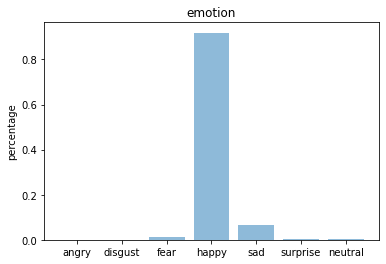

None


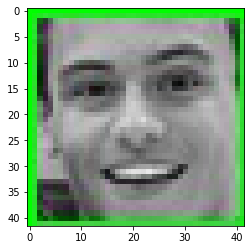

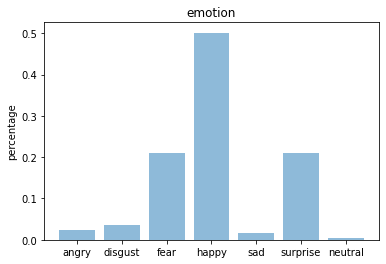

[[0.02345195 0.03495739 0.20984025 0.50113136 0.01626047 0.20981964
  0.00453897]]
0.50113136


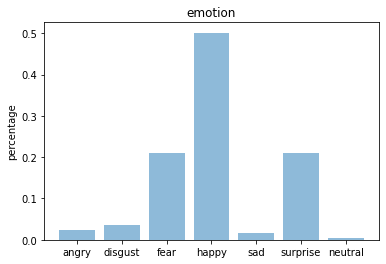

None


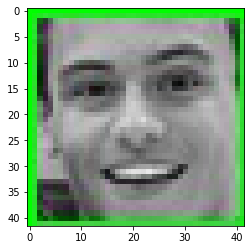

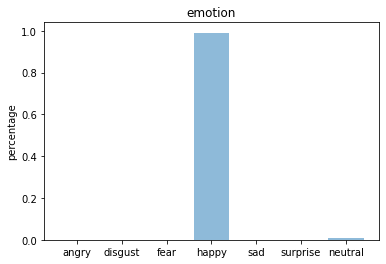

[[3.1373182e-07 2.3884748e-12 5.7439257e-07 9.9034089e-01 2.7288758e-07
  5.2468713e-10 9.6579287e-03]]
0.9903409


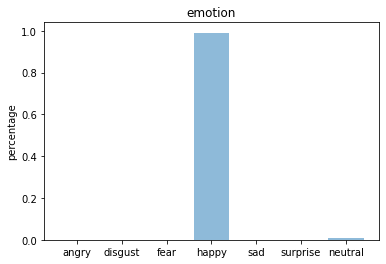

None


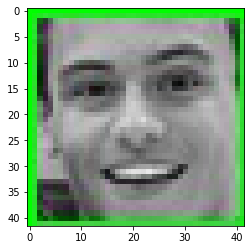

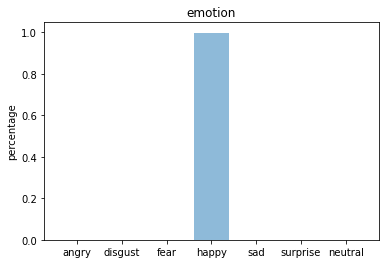

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


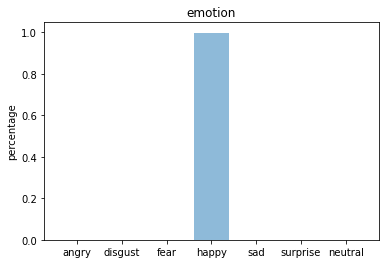

None


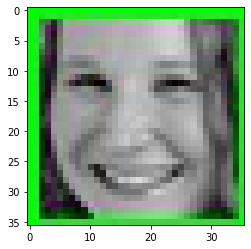

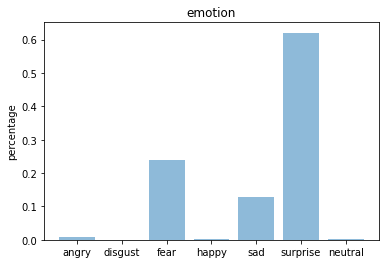

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


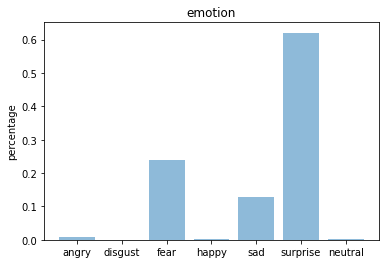

None


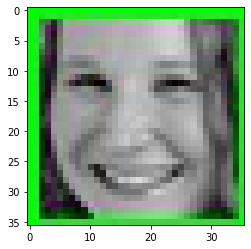

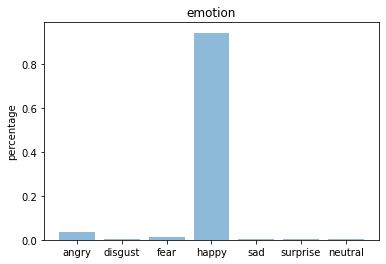

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


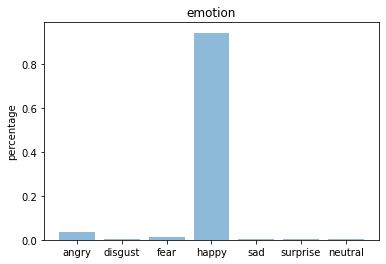

None


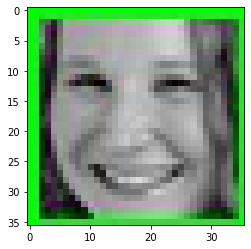

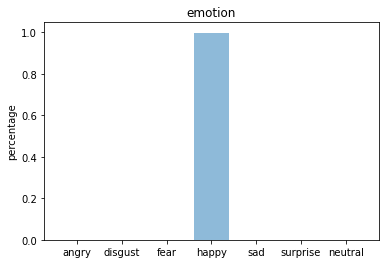

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


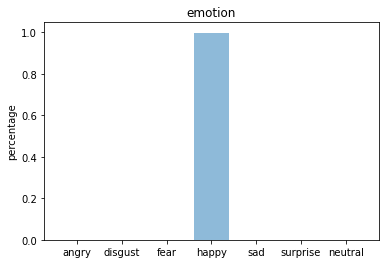

None


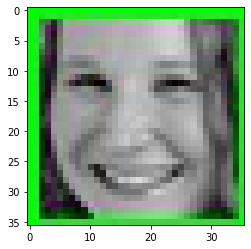

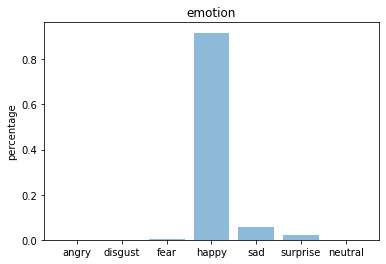

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


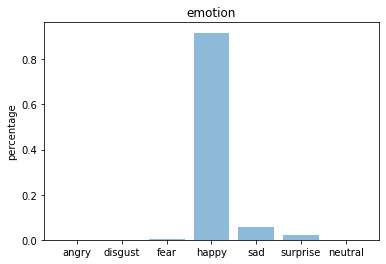

None


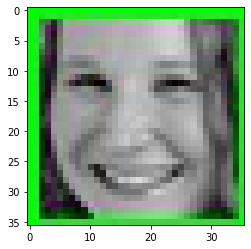

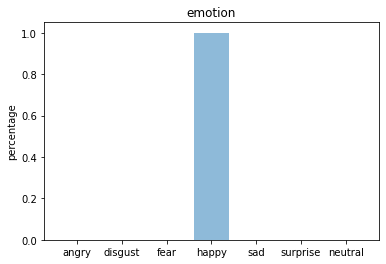

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


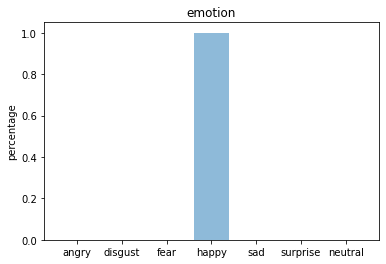

None


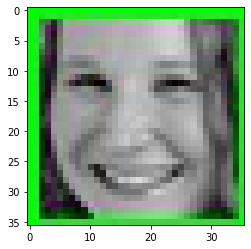

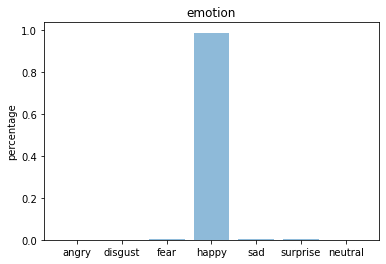

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


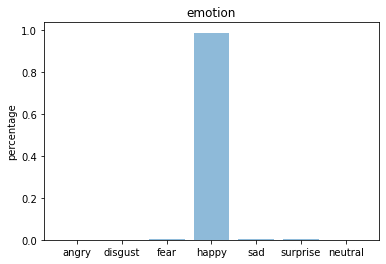

None


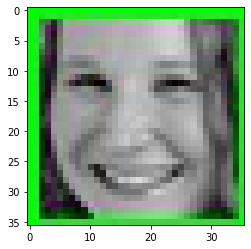

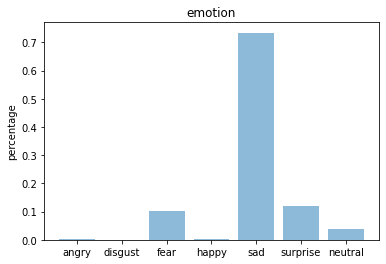

[[3.53266601e-03 1.28713600e-06 1.03346474e-01 1.98395387e-03
  7.33926892e-01 1.19504370e-01 3.77044231e-02]]
0.7339269


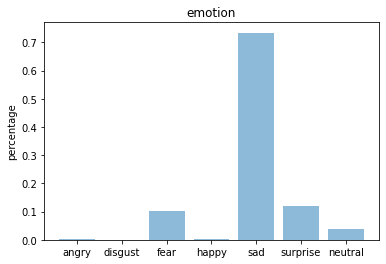

None


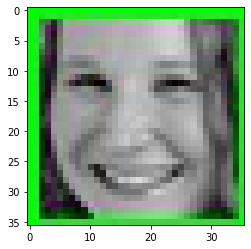

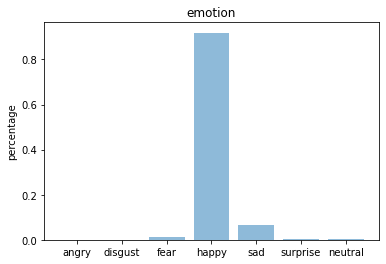

[[6.4829993e-04 1.0149136e-06 1.1666372e-02 9.1877925e-01 6.5536223e-02
  1.4567217e-03 1.9121328e-03]]
0.91877925


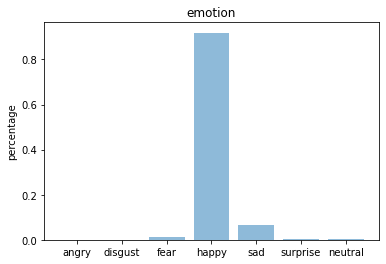

None


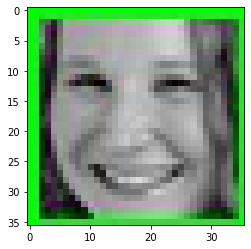

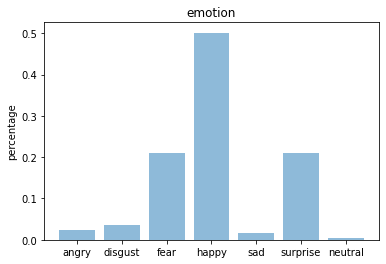

[[0.02345195 0.03495739 0.20984025 0.50113136 0.01626047 0.20981964
  0.00453897]]
0.50113136


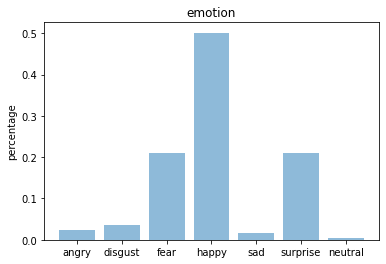

None


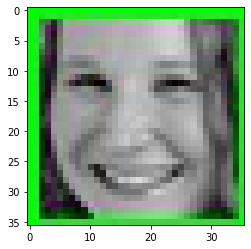

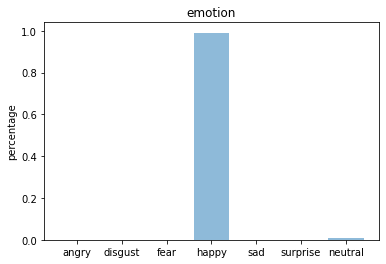

[[3.1373182e-07 2.3884748e-12 5.7439257e-07 9.9034089e-01 2.7288758e-07
  5.2468713e-10 9.6579287e-03]]
0.9903409


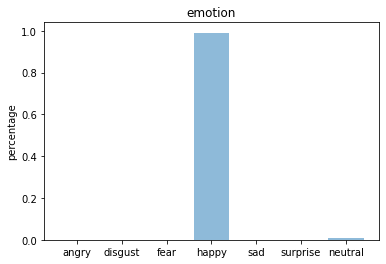

None


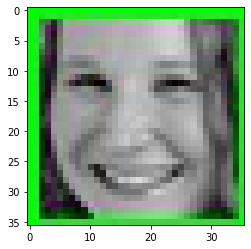

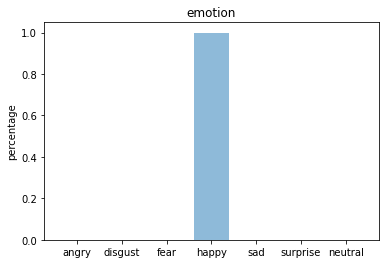

[[1.0644148e-05 3.0531351e-06 1.3801781e-05 9.9960917e-01 3.6191134e-04
  1.1247853e-07 1.3566033e-06]]
0.9996092


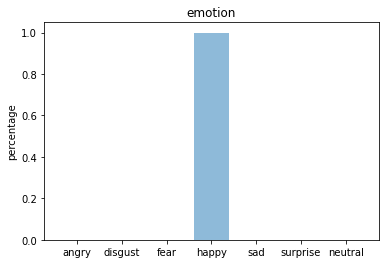

None


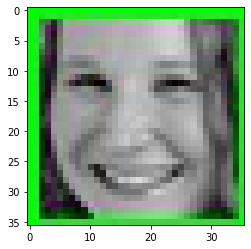

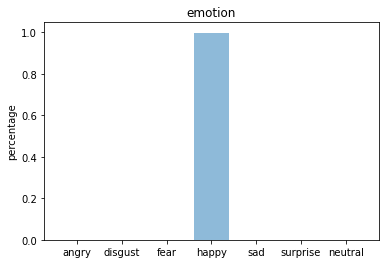

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


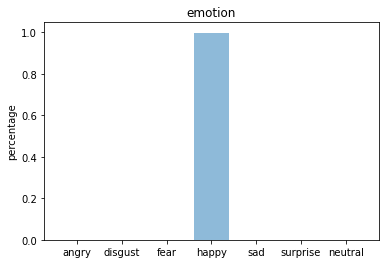

None


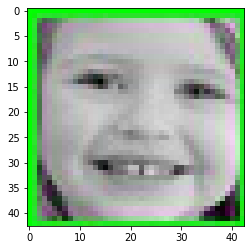

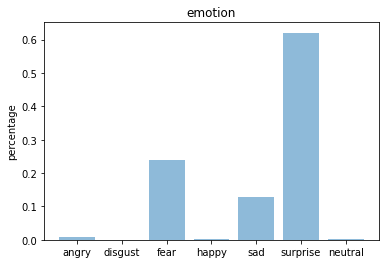

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


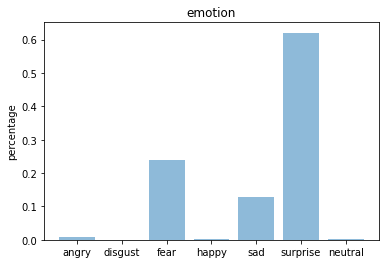

None


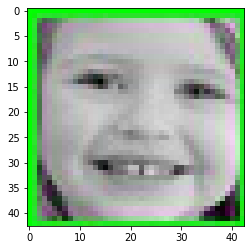

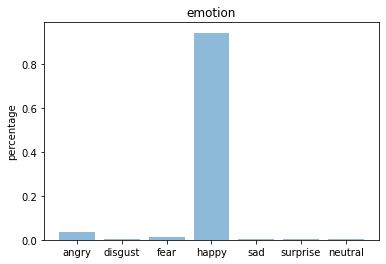

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


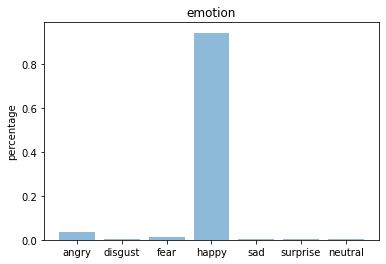

None


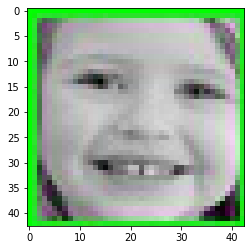

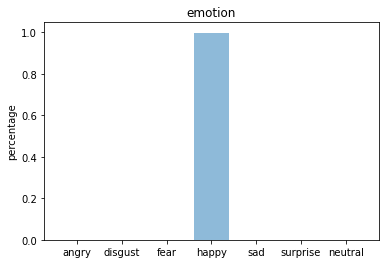

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


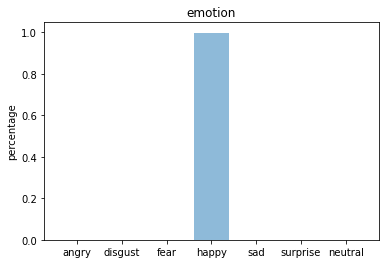

None


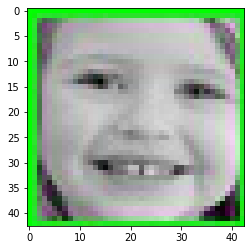

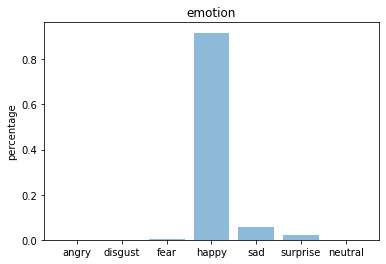

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


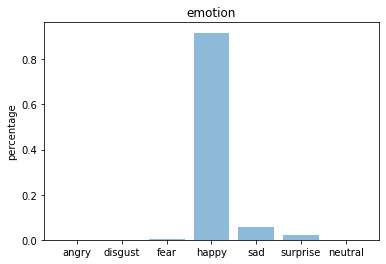

None


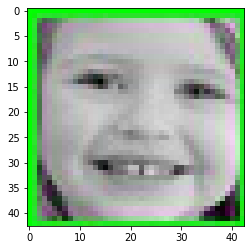

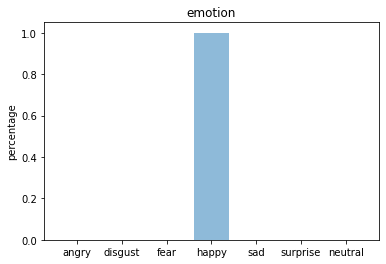

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


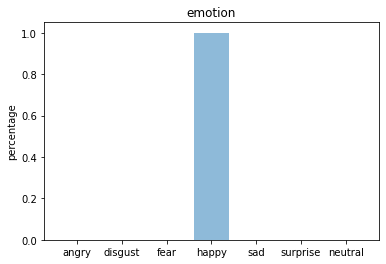

None


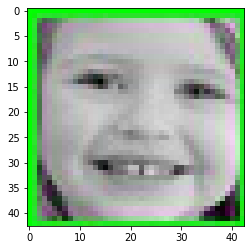

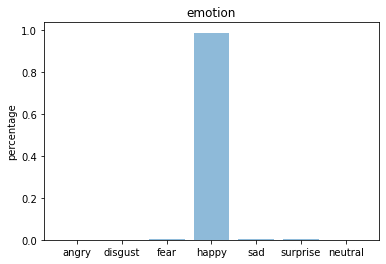

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


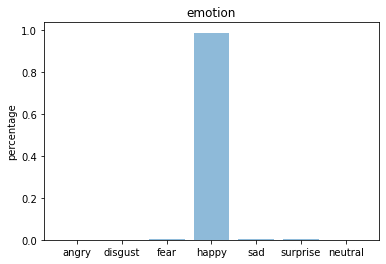

None


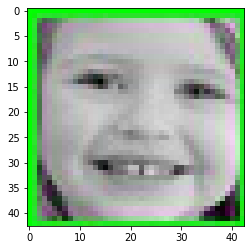

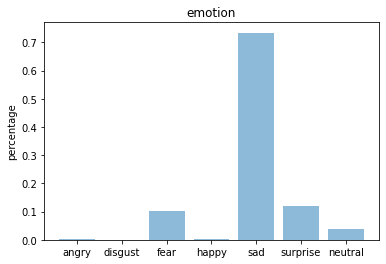

[[3.53266601e-03 1.28713600e-06 1.03346474e-01 1.98395387e-03
  7.33926892e-01 1.19504370e-01 3.77044231e-02]]
0.7339269


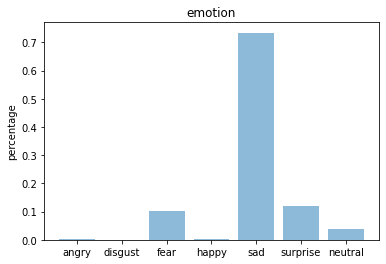

None


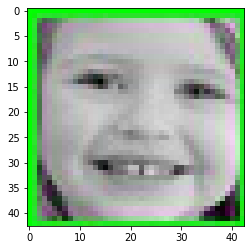

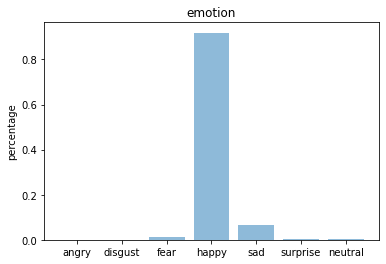

[[6.4829993e-04 1.0149136e-06 1.1666372e-02 9.1877925e-01 6.5536223e-02
  1.4567217e-03 1.9121328e-03]]
0.91877925


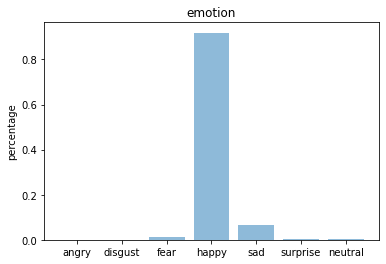

None


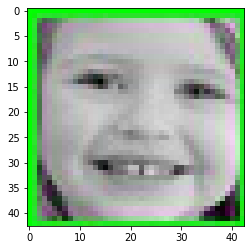

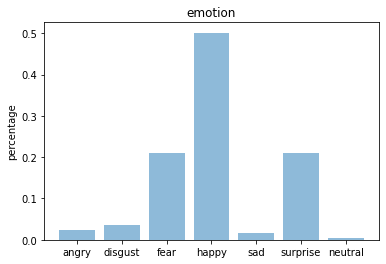

[[0.02345195 0.03495739 0.20984025 0.50113136 0.01626047 0.20981964
  0.00453897]]
0.50113136


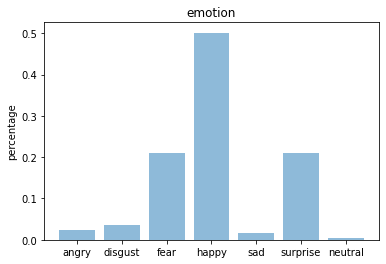

None


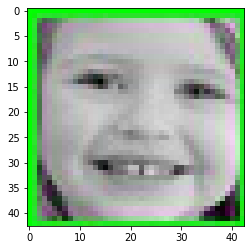

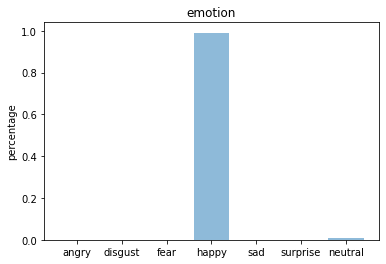

[[3.1373182e-07 2.3884748e-12 5.7439257e-07 9.9034089e-01 2.7288758e-07
  5.2468713e-10 9.6579287e-03]]
0.9903409


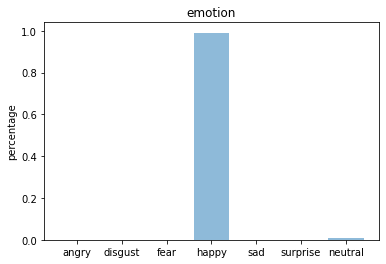

None


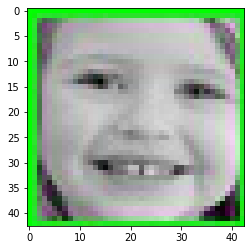

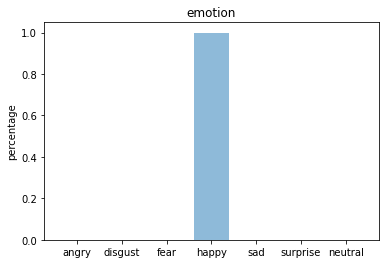

[[1.0644148e-05 3.0531351e-06 1.3801781e-05 9.9960917e-01 3.6191134e-04
  1.1247853e-07 1.3566033e-06]]
0.9996092


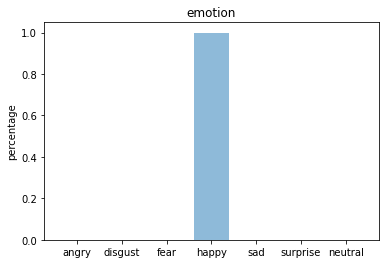

None


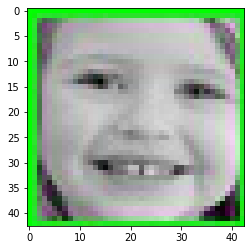

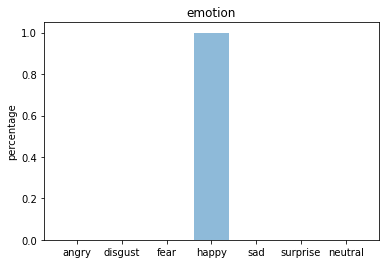

[[1.3652379e-06 7.3026143e-08 5.4473996e-05 9.9972636e-01 1.8053051e-04
  3.7118712e-05 1.4223596e-07]]
0.99972636


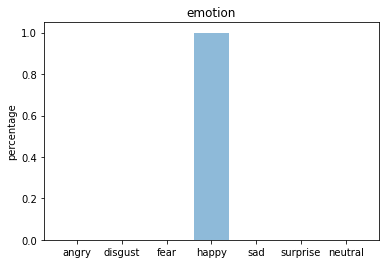

None


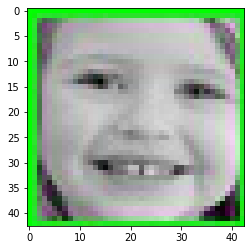

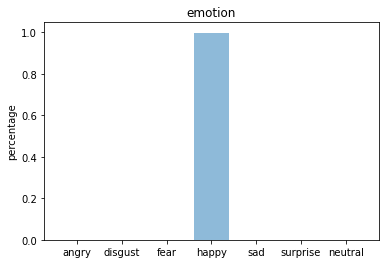

[[9.5975940e-07 7.0505130e-06 3.0215687e-04 9.9874324e-01 2.6483284e-04
  1.9041533e-04 4.9135764e-04]]
0.99874324


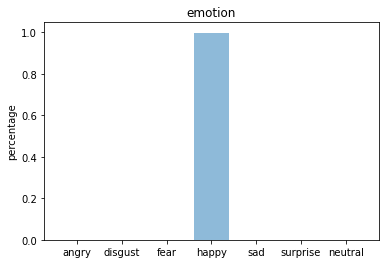

None


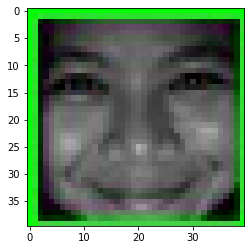

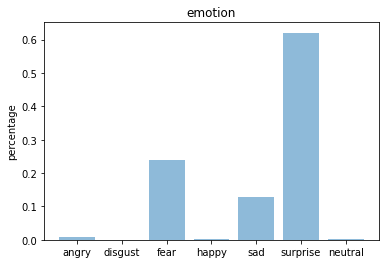

[[0.00956277 0.00067756 0.23780426 0.0027949  0.12709454 0.620401
  0.00166494]]
0.620401


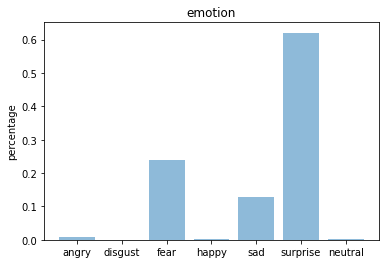

None


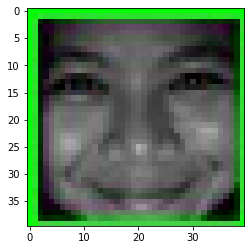

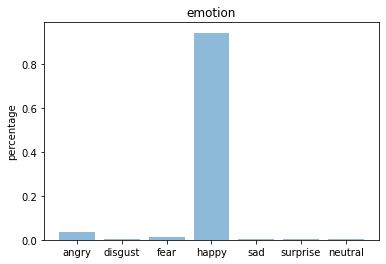

[[0.0338947  0.00139072 0.01401257 0.9421441  0.0021051  0.002668
  0.00378487]]
0.9421441


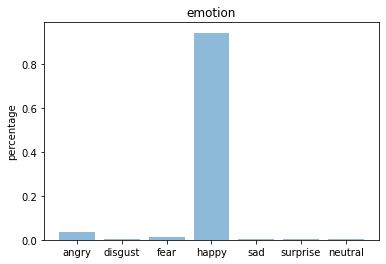

None


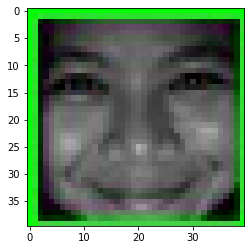

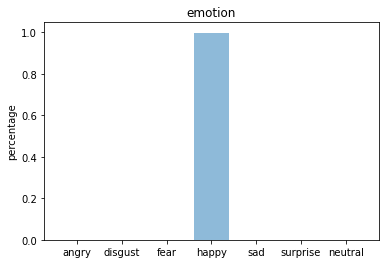

[[3.2061673e-04 2.9089227e-07 8.7015178e-05 9.9830592e-01 7.9459802e-04
  3.3369559e-04 1.5784883e-04]]
0.9983059


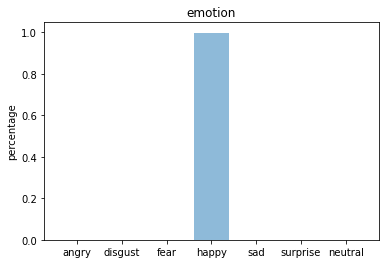

None


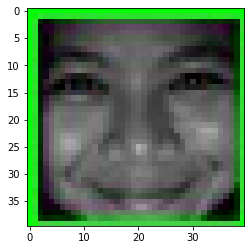

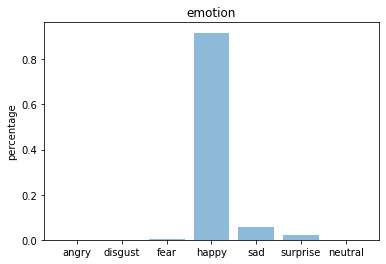

[[6.9286427e-05 2.0306926e-08 2.0292643e-03 9.1775608e-01 5.8841564e-02
  2.1286642e-02 1.7262124e-05]]
0.9177561


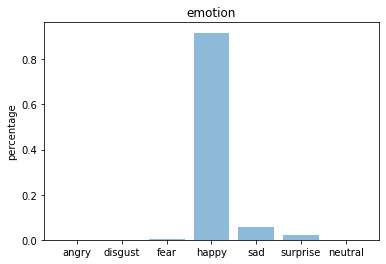

None


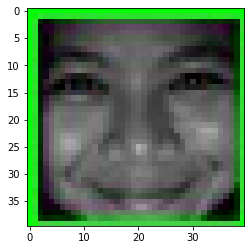

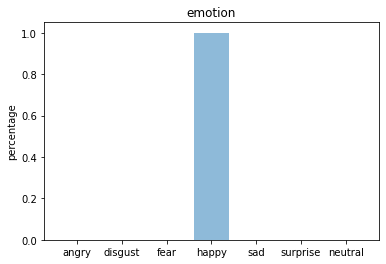

[[8.6280846e-07 5.7066430e-08 7.0191470e-07 9.9995100e-01 3.2854095e-05
  1.4468579e-05 4.5777004e-08]]
0.999951


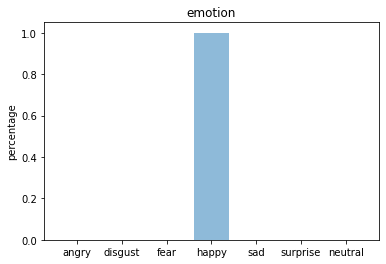

None


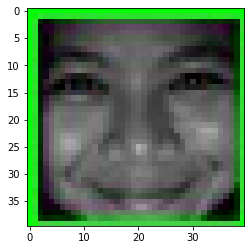

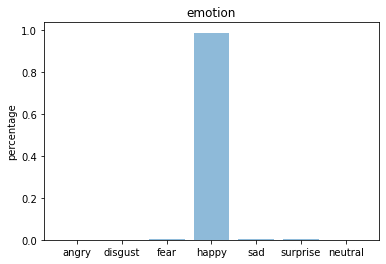

[[1.3433352e-04 9.4213465e-06 3.6367746e-03 9.8623031e-01 3.4175983e-03
  5.9281448e-03 6.4343476e-04]]
0.9862303


In [ ]:
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# import spicy as sc
# from scipy import misc


folder_valid = 'C:/Users/User/Desktop/test/happy_valid'
# 'C:/Users/User/Desktop/test/angry_valid/capture  {0}.jpg'
all_vald_img = []
all_vald_img_files = []
photo_count = 0
angry = 0
disgust = 0
fear = 0
happy = 0
sad = 0
surprise = 0
neutral = 0
    
for filename_valid in os.listdir(folder_valid):
    image_file_name = os.path.join(folder_valid,filename_valid)
    img0 = cv2.imread(image_file_name)  # Return the image as NumPy array in case of valid reading, and None if not valid.
    if img0 is not None:
        all_vald_img_files.append(image_file_name)

# print(all_vald_img)

# print(len(all_vald_img))
#     if photo_count == len(all_vald_img):
#         pass
#         file  = 'C:/Users/User/Desktop/test/happy_valid/capture{0}.jpg'.format(photo_count)
#         print(photo_count)
        true_image = image.load_img(image_file_name)
        img = image.load_img(image_file_name, color_mode="grayscale", target_size=(48, 48))
        all_vald_img.append(img)

        #  --------------------------------------------------------------------------------
        for real_img in all_vald_img:
            x = image.img_to_array(real_img)
            x = np.expand_dims(x, axis = 0)

            x /= 255

            custom = model.predict(x)
            emotion_analysis(custom[0])
            emo_reff = {'angry': custom[0][0], 'disgust': custom[0][1], 'fear': custom[0][2], 'happy': custom[0][3],
                        'sad': custom[0][4], 'surprise': custom[0][5], 'neutral': custom[0][6]}
            print(custom)
            print(max(custom[0]))
            print(emotion_analysis(custom[0]))
            if max(custom[0]) == emo_reff['angry']:
                angry += 1
            elif max(custom[0]) == emo_reff['disgust']:
                disgust += 1
            elif max(custom[0]) == emo_reff['fear']:
                fear += 1
            elif max(custom[0]) == emo_reff['happy']:
                happy += 1
            elif max(custom[0]) == emo_reff['sad']:
                sad += 1
            elif max(custom[0]) == emo_reff['surprise']:
                surprise += 1
            else:
                neutral += 1


            x = np.array(x, 'float32')
            x = x.reshape([48, 48]);

            plt.imshow(true_image)
            plt.show()
        
#     ----------------------------------------------------------------------------------
#     file  = 'C:/Users/User/Desktop/test/angry_valid/capture355.jpg'
# #     print(photo_count)
#     true_image = image.load_img(file)
#     img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


#     #  --------------------------------------------------------------------------------
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)

#     x /= 255

#     custom = model.predict(x)
#     emotion_analysis(custom[0])
#     print(custom)
#     print(max(custom[0]))
#     print(emotion_analysis(custom[0]))

#     x = np.array(x, 'float32')
#     x = x.reshape([48, 48]);

#     plt.imshow(true_image)
#     plt.show()

In [ ]:
print("angry =", angry)
print("disgust =", disgust)
print("fear =", fear)
print("happy =", happy)
print("sad =", sad)
print("surprise =", surprise)
print("neutral =", neutral)
print("\n")

total = angry + disgust + fear + happy + sad + surprise + neutral
print("Total =", total)

print("happy precentage % =", (happy/total) *100)
